<a href="https://colab.research.google.com/github/raghavkaushik/DeepLearning/blob/main/TF_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from tensorflow.keras.layers import Dense, Dropout, Conv2D, GlobalMaxPooling2D, Input, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np 

In [7]:
(Xtrain,Ytrain),(Xtest,Ytest)=mnist.load_data()

In [8]:
num_labels=len(np.unique(Ytrain))
print("Number of labels:",num_labels)

Number of labels: 10


In [9]:
Xtrain,Xtest=Xtrain/255.0,Xtest/255.0

In [12]:
Xtrain=np.expand_dims(Xtrain,-1)
Xtest=np.expand_dims(Xtest,-1)

In [15]:
input_shape=Xtrain[0].shape
print(input_shape)

(28, 28, 1)


In [19]:
input=Input(shape=input_shape)
x=Conv2D(64,(3,3),activation='relu')(input)
x=MaxPooling2D()(x)
x=Conv2D(64,(3,3),activation='relu')(x)
x=MaxPooling2D()(x)
x=Conv2D(64,(3,3),activation='relu')(x)
x=GlobalMaxPooling2D()(x)
x=Dropout(0.2)(x)
output=Dense(num_labels,activation='softmax')(x)

model=Model(input,output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928 

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
r=model.fit(Xtrain,Ytrain,validation_data=(Xtest,Ytest),epochs=20, batch_size=128)

Epoch 1/20
469/469 [==============================] - 77s 163ms/step - loss: 0.4057 - accuracy: 0.8756 - val_loss: 0.0931 - val_accuracy: 0.9693
Epoch 2/20
469/469 [==============================] - 76s 163ms/step - loss: 0.1221 - accuracy: 0.9634 - val_loss: 0.0564 - val_accuracy: 0.9829
Epoch 3/20
469/469 [==============================] - 76s 162ms/step - loss: 0.0864 - accuracy: 0.9730 - val_loss: 0.0410 - val_accuracy: 0.9877
Epoch 4/20
469/469 [==============================] - 76s 162ms/step - loss: 0.0666 - accuracy: 0.9797 - val_loss: 0.0420 - val_accuracy: 0.9877
Epoch 5/20
469/469 [==============================] - 76s 162ms/step - loss: 0.0585 - accuracy: 0.9822 - val_loss: 0.0426 - val_accuracy: 0.9867
Epoch 6/20
469/469 [==============================] - 76s 162ms/step - loss: 0.0490 - accuracy: 0.9846 - val_loss: 0.0298 - val_accuracy: 0.9901
Epoch 7/20
469/469 [==============================] - 76s 162ms/step - loss: 0.0407 - accuracy: 0.9864 - val_loss: 0.0340 - val_ac

In [24]:
score = model.evaluate(Xtest,
                       Ytest,
                       batch_size=128,
                       verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))


Test accuracy: 99.1%


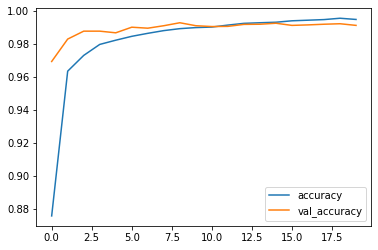

In [25]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()